<a href="https://colab.research.google.com/github/nathon-tadeo/Intro-to-ML/blob/main/homework_4_intro_to_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.metrics import classification_report

Optimal number of principal components (K) for highest accuracy: 28
Highest accuracy with K:28: 0.9824561403508771


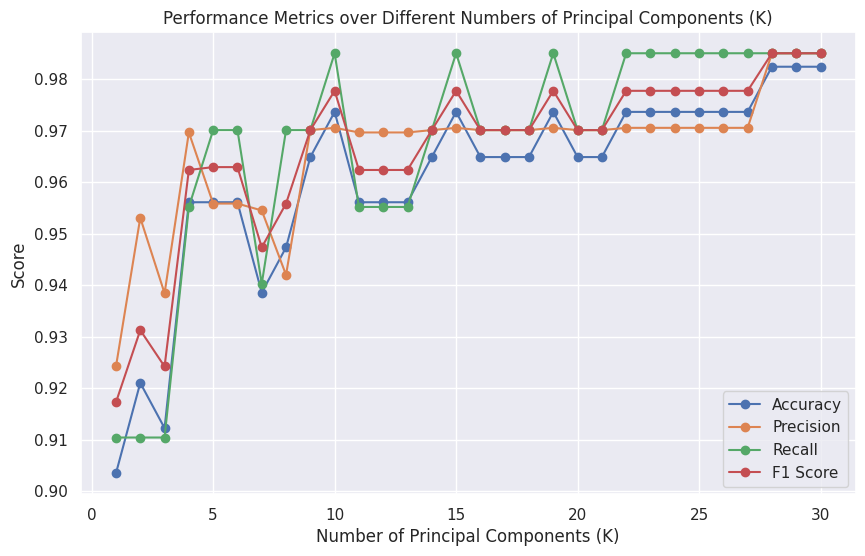

In [108]:
#Problem 1 Use the cancer dataset to build an SVM classifier to classify the type of cancer (Malignant vs. benign).
#Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K).

from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()

X = breast.data
Y = breast.target

# Split data into training (80%) and validation (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size = 0.20, random_state = 0)

#Standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#PCA Training
from sklearn.decomposition import PCA
from scipy import stats

# Lists to store metrics for different values of K
accuracies = []
precisions = []
recalls = []
f1_scores = []
k_values = list(range(1, X_train.shape[1] + 1))  # K from 1 to 30 (the number of features)

# Loop over different values of K (number of principal components)
for k in k_values:
    # Apply PCA with k components
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train an SVM classifier with a linear kernel
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score #import metrics here
    svm = SVC(kernel='linear', random_state=0)
    svm.fit(X_train_pca, Y_train)

    # Predict on the test set
    Y_pred = svm.predict(X_test_pca)

    # Calculate performance metrics
    acc = accuracy_score(Y_test, Y_pred)
    prec = precision_score(Y_test, Y_pred)
    rec = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)

    # Store the metrics
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

# Identify the optimum number of K components for highest accuracy
best_k = k_values[np.argmax(accuracies)]
print(f"Optimal number of principal components (K) for highest accuracy: {best_k}")
print(f"Highest accuracy with K:{best_k}: {np.max(accuracies)}")

# Plot the metrics over different values of K
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, label='Accuracy', marker='o')
plt.plot(k_values, precisions, label='Precision', marker='o')
plt.plot(k_values, recalls, label='Recall', marker='o')
plt.plot(k_values, f1_scores, label='F1 Score', marker='o')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.title('Performance Metrics over Different Numbers of Principal Components (K)')
plt.legend()
plt.grid(True)
plt.show()

#Identify the optimum number of K, principal components that achieve the highest classification accuracy.
#Plot your classification accuracy, precision, and recall over a different number of Ks.

Kernel: linear
Best K: 28
Accuracy for best K:  0.9824561403508771
       
Kernel: poly
Best K: 11
Accuracy for best K:  0.9122807017543859
       
Kernel: rbf
Best K: 9
Accuracy for best K:  0.9824561403508771
       
Kernel: sigmoid
Best K: 10
Accuracy for best K:  0.9649122807017544
       


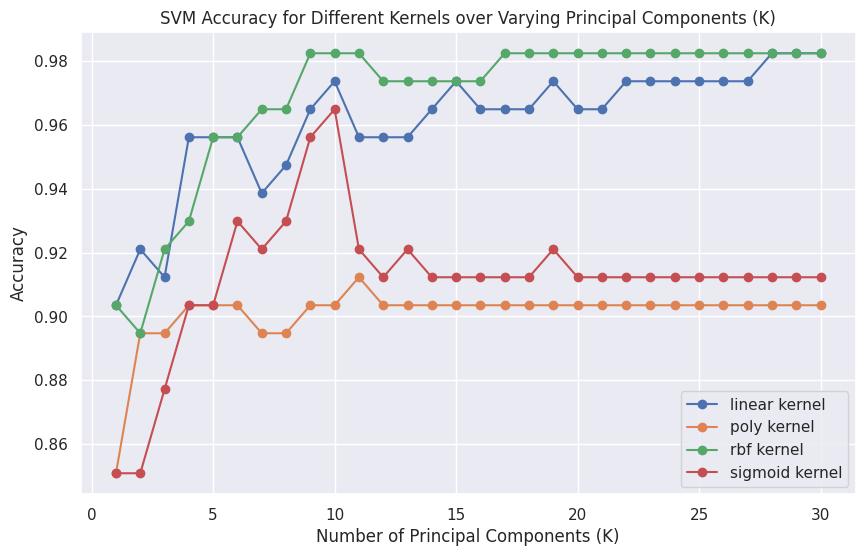

In [109]:
# Set up values of K and kernels to explore
k_values = list(range(1, X_train.shape[1] + 1))
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_results = {kernel: {'ks': [], 'accuracy': []} for kernel in kernels}

# Loop over each kernel type
for kernel in kernels:
    # Initialize best accuracy and best k for each kernel
    best_accuracy = 0
    best_k = None

    # Loop over each value of K
    for k in k_values:
        # Apply PCA
        pca = PCA(n_components=k)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        # Train SVM
        svm = SVC(kernel=kernel, random_state=0)
        svm.fit(X_train_pca, Y_train)

        # Predict and calculate accuracy
        Y_pred = svm.predict(X_test_pca)
        accuracy = accuracy_score(Y_test, Y_pred)

        # Store accuracy for this kernel and K
        kernel_results[kernel]['ks'].append(k)
        kernel_results[kernel]['accuracy'].append(accuracy)

        # Update best accuracy and best K for this kernel
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k

    # Output best K and accuracy for the current kernel
    print(f"Kernel: {kernel}")
    print(f"Best K: {best_k}")
    print("Accuracy for best K: ", best_accuracy)
    print("       ")

# Plot accuracies for each kernel as a function of K
plt.figure(figsize=(10, 6))
for kernel in kernels:
    plt.plot(k_values, kernel_accuracies[kernel], label=f'{kernel} kernel', marker='o')

plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy for Different Kernels over Varying Principal Components (K)')
plt.legend()
plt.show()
#Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for different kernels.

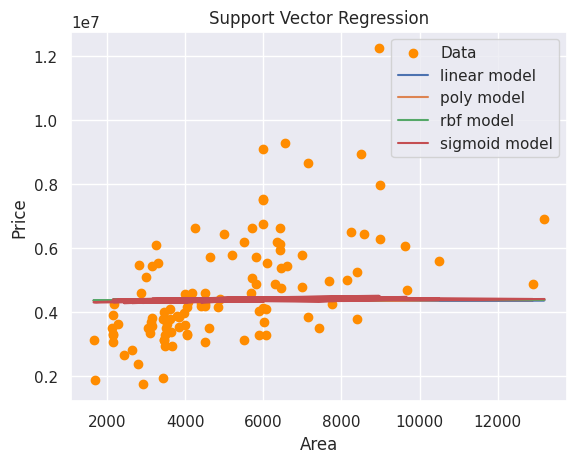

In [110]:
#Problem 2 Develop a SVR regression model that predicts housing price based on the following input variables:
#Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

# Load the dataset
URL = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv'
housing = pd.read_csv(URL)

# Convert categorical variables to binary
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
housing[varlist] = housing[varlist].apply(binary_map)

# Define input features and target variable
X = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
             'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y = housing['price']

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the kernels to be tested
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Store the models and predictions for plotting
models = {kernel: None for kernel in kernels}
predictions = {kernel: None for kernel in kernels}

# Function to train and evaluate SVR with PCA
def train_evaluate_svr(kernel, n_components):
    if kernel == 'rbf':
        model = SVR(kernel=kernel, C=1e3, gamma=0.1)
    elif kernel == 'poly':
        model = SVR(kernel=kernel, C=1e3, degree=2, gamma='scale')
    elif kernel == 'sigmoid':
        model = SVR(kernel=kernel, C=1e3, gamma='scale')
    else:
        model = SVR(kernel=kernel, C=1.0, gamma='auto')

    pipeline = make_pipeline(PCA(n_components=n_components), model)
    pipeline.fit(X_train_scaled, y_train)
    y_pred = pipeline.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)

    # Store model and predictions
    models[kernel] = model
    predictions[kernel] = y_pred

    return mse

# Determine the optimal number of components for each kernel
max_components = min(X_train_scaled.shape[1], X_train_scaled.shape[0])
mse_results = {kernel: [] for kernel in kernels}
n_components_range = range(1, max_components + 1)
best_n_components = {kernel: None for kernel in kernels}

for n_components in n_components_range:
    for kernel in kernels:
        mse = train_evaluate_svr(kernel, n_components)
        mse_results[kernel].append(mse)
        # Store the best n_components
        if best_n_components[kernel] is None or mse < min(mse_results[kernel]):
            best_n_components[kernel] = n_components

# Plotting the SVR results on test data
plt.scatter(X_test['area'], y_test, color='darkorange', label='Data')
for kernel in kernels:
    plt.plot(X_test['area'], predictions[kernel], label=f'{kernel} model')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

Kernel: linear | Best K: 1 | Accuracy: -0.041
Kernel: poly | Best K: 2 | Accuracy: -0.005
Kernel: rbf | Best K: 1 | Accuracy: 0.014
Kernel: sigmoid | Best K: 1 | Accuracy: 0.089


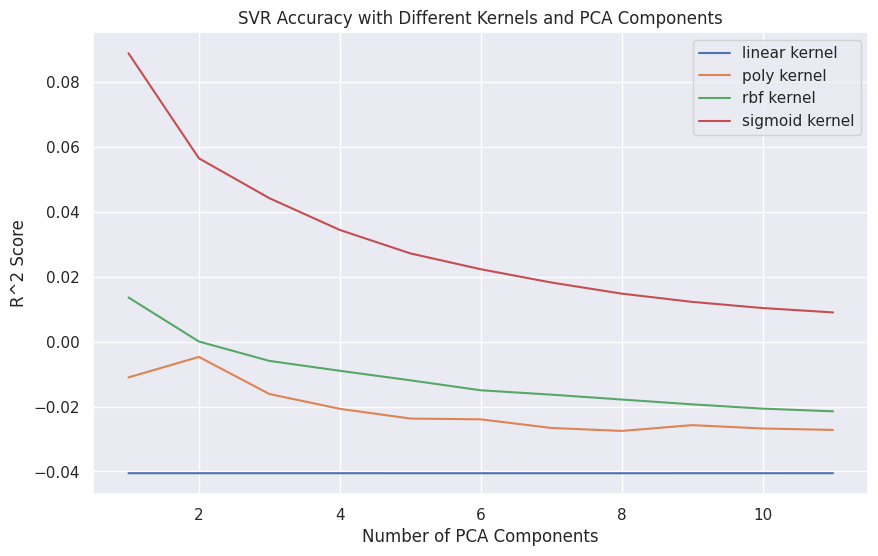

In [111]:
from sklearn.metrics import r2_score

# Define a range for PCA components and kernels
n_components_range = range(1, min(X_train_scaled.shape[1], X_train_scaled.shape[0]) + 1)
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_results = {kernel: {'ks': [], 'accuracy': []} for kernel in kernels}

# Store best results
best_kernels = {}
for kernel in kernels:
    best_accuracy = -np.inf  # Initialize as a very low number for maximization
    best_k = None

    # Loop through different numbers of PCA components
    for k in n_components_range:
        # Apply PCA with k components
        pca = PCA(n_components=k)
        X_train_pca = pca.fit_transform(X_train_scaled)
        X_test_pca = pca.transform(X_test_scaled)

        # Train SVR with the given kernel
        if kernel == 'poly':
            model = SVR(kernel=kernel, C=1000, degree=2, gamma='scale')
        elif kernel == 'rbf':
            model = SVR(kernel=kernel, C=1000, gamma=0.1)
        elif kernel == 'sigmoid':
            model = SVR(kernel=kernel, C=1000, gamma='scale')
        else:  # Linear kernel
            model = SVR(kernel=kernel, C=1.0, gamma='auto')

        # Fit the model
        model.fit(X_train_pca, y_train)

        # Predict and calculate accuracy
        y_pred = model.predict(X_test_pca)
        accuracy = r2_score(y_test, y_pred)  # Adjust this metric if desired

        # Store results for plotting
        kernel_results[kernel]['ks'].append(k)
        kernel_results[kernel]['accuracy'].append(accuracy)

        # Track best accuracy for this kernel
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k

    # Store the best K and accuracy for each kernel
    best_kernels[kernel] = {'best_k': best_k, 'best_accuracy': best_accuracy}
    print(f"Kernel: {kernel} | Best K: {best_k} | Accuracy: {best_accuracy:.3f}")

# Plot results for each kernel
plt.figure(figsize=(10, 6))
for kernel in kernels:
    plt.plot(kernel_results[kernel]['ks'], kernel_results[kernel]['accuracy'], label=f'{kernel} kernel')

plt.xlabel('Number of PCA Components')
plt.ylabel('R^2 Score')  # or Mean Absolute Error, RMSE depending on chosen metric
plt.title('SVR Accuracy with Different Kernels and PCA Components')
plt.legend()
plt.show()